In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sn

In [19]:
alpha = ["hand_size","pile_size","num_hand_ranks","num_possible_pile_ranks"]

features = alpha

In [20]:
df = pd.read_csv('alpha.csv')
display(df.T)

np.set_printoptions(edgeitems = 200, linewidth = 150)
# df.values

,0,1,2,3,4,5,6,7,8,9,...,12334180,12334181,12334182,12334183,12334184,12334185,12334186,12334187,12334188,12334189
is_winner,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
hand_size,11.0,11.0,11.0,10.0,15.0,10.0,10.0,8.0,13.0,9.0,...,18.0,2.0,14.0,5.0,16.0,1.0,16.0,12.0,14.0,0.0
pile_size,3.0,2.0,3.0,4.0,2.0,2.0,2.0,3.0,4.0,2.0,...,4.0,5.0,2.0,2.0,3.0,2.0,2.0,3.0,5.0,2.0
num_hand_ranks,7.0,8.0,7.0,6.0,8.0,7.0,6.0,5.0,7.0,6.0,...,6.0,2.0,5.0,2.0,5.0,1.0,5.0,4.0,4.0,0.0
num_possible_pile_ranks,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [21]:
# features for regression input
f =  alpha
# feature for regression output
g = "is_winner"

# feature for dependent plot
var = "hand_size"


print("\n".join(f"**{el}**" if el == var else el for el in f))
print("-------")
print(g)

**hand_size**
pile_size
num_hand_ranks
num_possible_pile_ranks
-------
is_winner


CSV LINE:

0.2499412534,-0.0000607873,0.0000577619,0.0000015379,0.0002623083 


R^2:   4.986479235080665e-07 




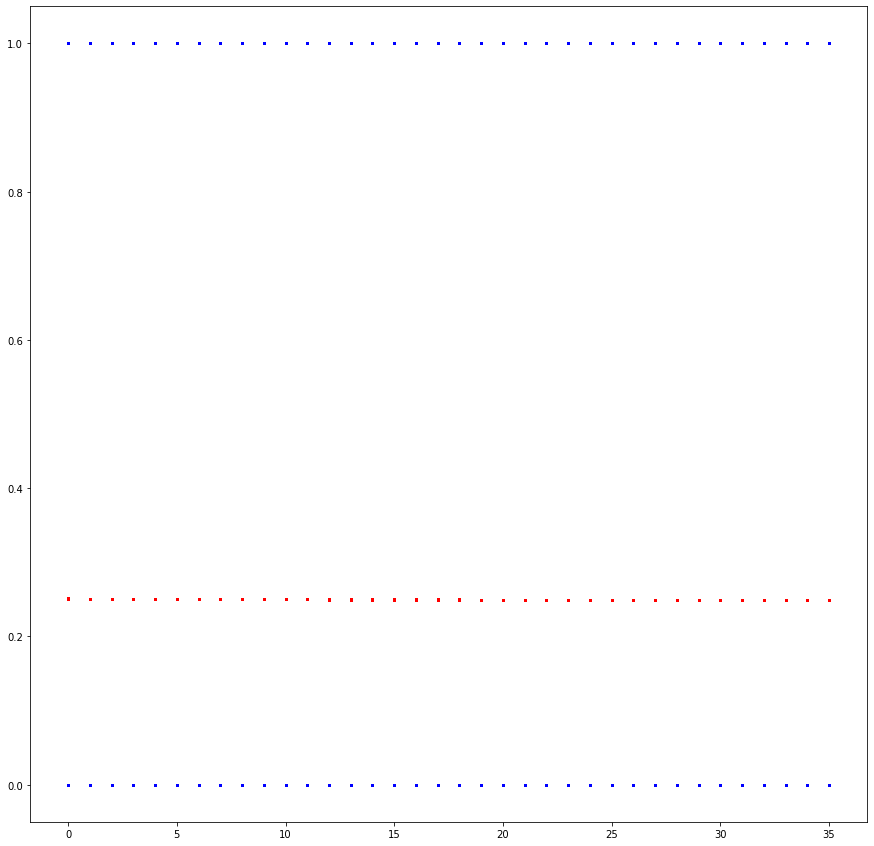

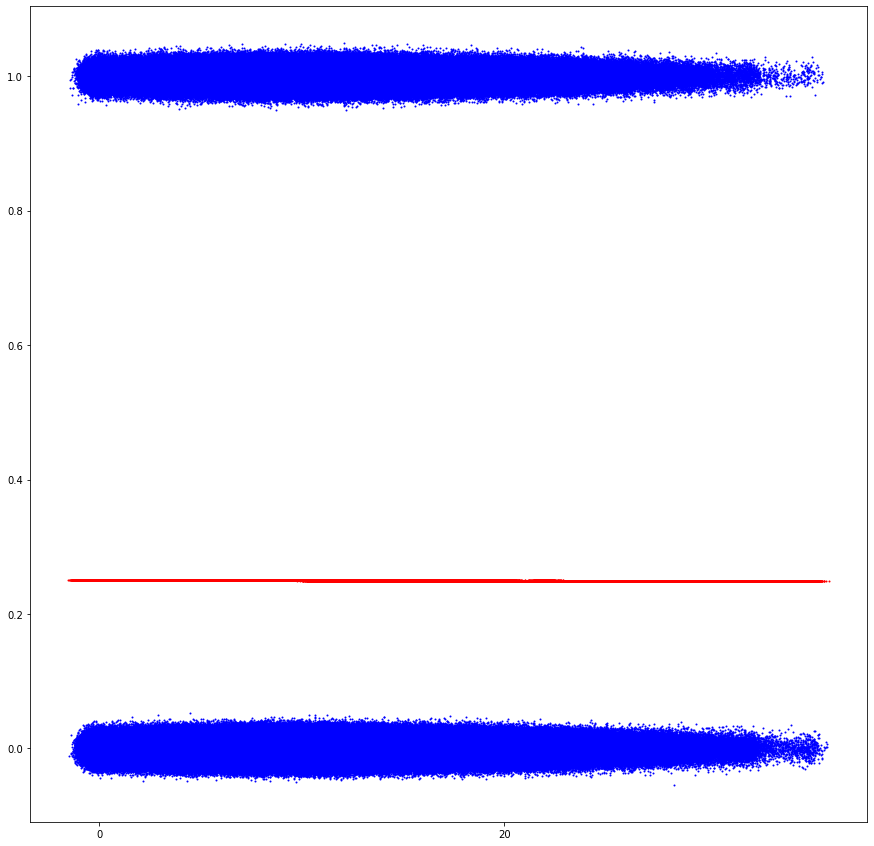

In [22]:
X = df[f]
y = df[[g]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
for i in range(len(features)):
    if features[i] in f:
        line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][f.index(features[i])])
    else:
        line += ",0"
print(line, "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)


fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[[g]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()